# Project: Investigating the TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set under investigation contains information on over 10,000 movies compiled from The Movie Database (TMDb). It portrays detailed information about movies collected over 50 years, including revenues earned and popularity. Columns in the dataset portray various features of the movies as follows:
1. Id - Id assigned by the TMDb database
2. Imdb Id - External Id for the dataset
3. Popularity - Movie's rank based on page views related to the film
4. Budget - The budget of the movie
5. Revenue - The revenue of the movie
6. Original title - The name of the movie
7. Cast - The actors in the movie
8. Homepage - The movie's official website
9. Director - The person who manages production of the movie
10. Tagline - A catchphrase for the movie
11. Keywords - Words that best describe the content of the movie
12. Overview - a brief description of the movie's plot
13. Runtime - The length of the movie
14. Genres - The type of movie
15. Production companies - The movie company that produces the movie
16. Release date - The date the movie was released
17. Vote count - Individual votes cast on a movie
18. Vote_average - Mean of the votes cast on a movie
19. Release year - The year the movie was released
20. Budget_adj -  The budget of the movie in terms of 2010 dollars, accounting for inflation over time.
21. Revenue_adj -  The revenue of the movie in terms of 2010 dollars, accounting for inflation over time.

The primary objective of this investigation is to determine whether correlations exist between different characteristics of movies and popularity. Focusing on the last 10 years of the dataset, part of the investigation will also seek to determine whether the month a movie is released influences its popularity or revenue.

In [1]:
# Importing all the packages intended to analyze the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\PC\anaconda3\envs\Project1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [147]:
#Loading the movie data from a csv file and printing out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


<a id='wrangling'></a>
## Data Wrangling

### Data Cleaning

This section involves primary cleaning of the data and finding out if there are any potential issues. This will include changing data types, finding missing values, dropping duplicates and dropping columns that are not useful in answering the research questions.

In [148]:
#To find any potential issues with the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Findings: The columns **cast**, **homepage**, **director**, **tagline**, **keywords**, **overview**, **genres**, and **production_companies** have missing data.

In [149]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Findings: It also seems that some of the columns are not saved as correct data types for instance **release_date** is saved as a string instead of datetime object

In [150]:
#To find if there are duplicated rows
sum(df.duplicated())

1

Only one duplicate was found and it can be dropped

In [151]:
#To drop the duplicated row
df.drop_duplicates(inplace=True)

In [152]:
#To check if the duplicates were dropped
sum(df.duplicated())

0

In [153]:
#To find out the number of rows and columns
df.shape

(10865, 21)

In [154]:
#To address the issue of incorrect data types for the **release_date** column, I'll be changing the column from string to datetime type
df['release_date'] = pd.to_datetime(df['release_date'])

In [155]:
#To check if the data type has changed
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [156]:
#To find the column names for the entire data set
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The following columns are either repeated or not necessary in answering the two research questions and will be dropped:
1. id column is a better unique identifier
2. budget and revenue are not necessary since they do not account for inflation.
3. cast, homepage, tagline, keywords, overview, and production_companies will not be useful.

In [157]:
#To drop columns that are not useful in anwering the research questions
df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

In [158]:
#Confirm changes
df.head(2)

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  What Determines a Highly Popular Movie?

To answer this question a statistical analysis of various features of the dataset.

In [159]:
#df.describe generates descriptive statistics about the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10865.0,6.606637e+04,9.213409e+04,5.000000,10596.000000,20662.000000,7.561200e+04,4.178590e+05
popularity,10865.0,6.464456e-01,1.000231e+00,0.000065,0.207575,0.383831,7.138570e-01,3.298576e+01
runtime,10865.0,1.020718e+02,3.138270e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10865.0,2.173996e+02,5.756446e+02,10.000000,17.000000,38.000000,1.460000e+02,9.767000e+03
vote_average,10865.0,5.975012e+00,9.351381e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10865.0,2.001322e+03,1.281326e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10865.0,1.754989e+07,3.430753e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10865.0,5.136900e+07,1.446383e+08,0.000000,0.000000,0.000000,3.370173e+07,2.827124e+09


Findings: This statistical analysis shows that the earliest movie in the data set was released in 1960 and the latest movie released in 2015. The budget and revenue feilds show zero vales as minimum which may pose a few challenges. 

In [160]:
#To find the correlation between popularity and different features of movies.
df.corr().popularity

id             -0.014351
popularity      1.000000
runtime         0.139032
vote_count      0.800828
vote_average    0.209517
release_year    0.089806
budget_adj      0.513555
revenue_adj     0.609085
Name: popularity, dtype: float64

Findings: There seems to be a high correlation between all the variables except id. Correlation tests the relationship between two variables. “0” indicates that there is no relationship between the variables, -1 indicates a perfect negative correlation whereas 1 means that there is a  positive correlation. A heatmap can provide an interesting visualization for the correlation analysis.

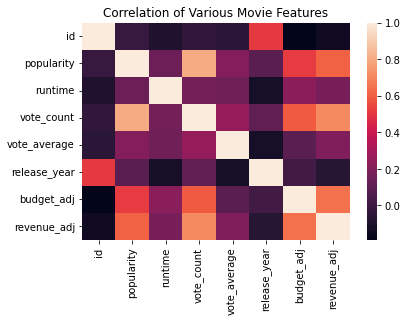

<Figure size 936x936 with 0 Axes>

In [161]:
#to visualize the correlation between the different features of movies a heatmap comes in handy
sns.heatmap(df.corr())
plt.title('Correlation of Various Movie Features')
plt.figure (figsize= (13,13));

Findings: While the correlation analysis above provides the relationship between various features of movies as relates to popularity. The analysis however, only contains numerical data. It would be useful to see how variables that do not contain numerical data influence popularity. 

#### What is the average popularity for each director?
People who enjoy watching movies are often keen on the movie director. I would like to find out the vote average for each director 

In [162]:
#To get the average popularity for each director
df[['popularity', 'director']].groupby('director').agg(['mean','count']).sort_values(by=('popularity','mean'), ascending=False)[:10]

popularity      
                                  mean count
director                                    
Colin Trevorrow              16.696886     2
Joe Russo|Anthony Russo      12.971027     1
Chad Stahelski|David Leitch  11.422751     1
Don Hall|Chris Williams       8.691294     1
Juno John Lee                 8.411577     1
Kyle Balda|Pierre Coffin      7.404165     1
Alan Taylor                   6.883129     2
Peter Richardson              6.668990     1
Pete Docter                   6.326804     1
Christopher Nolan             6.195521    10

It seems that the top ten directors with the highest popularity have released mostly 1 or 2 movies which may not give a very good representation of the entire data. Let's find out which director has the most movies produced.

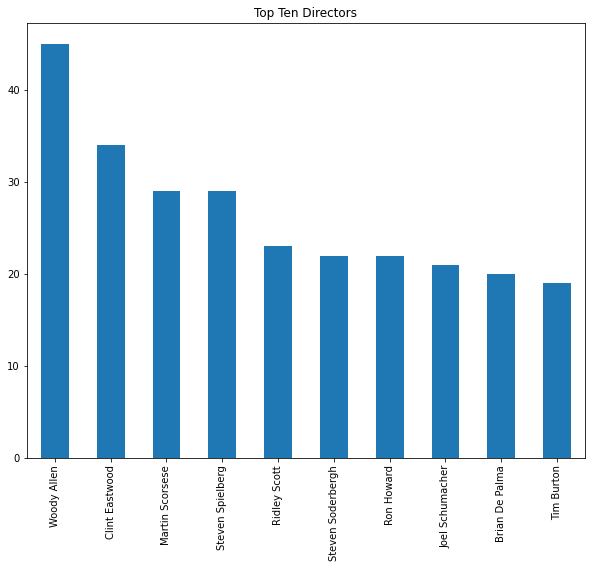

In [163]:
#To get the top ten directors with the highest number of movies produced
movies_per_directors = df.director.value_counts(ascending=False)[:10]
movies_per_directors.plot(kind='bar', figsize=(10,8), sort_columns='True', title='Top Ten Directors');

Findings: The above analysis shows that the number of movies a producer makes does not influence their popularity

#### Which director produced the movie with the highest revenue earnings?

In [164]:
#Find the highest revenue movie in the data set
df['revenue_adj'].max()

2827123750.0

In [165]:
#To find the features of the highest revenue movie
df[df['revenue_adj'].max() == df['revenue_adj']]

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,240886902.9,2.827124e+09


Findings: From the above analysis, we can see that the highest revenue earned was over two billion dollars and directed by James Cameron who does not appear on the list of directors who have produced the highest number of movies nor directors who's movies rank high in popularity.

#### Which director produced the longest movie?

In [200]:
#Find the longest movie in the data set
df['runtime'].max()

900

Findings: The longest movie produced was 900 minutes long. It would be interesting to see who produced it and its genre.

In [204]:
#To find the longest movie
df[df['runtime'].max() == df['runtime']]

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,2011-09-03,14,9.2,2011,0.0,0.0,September,Saturday


In [203]:
#To find the director who produced the longest movie
df[df['runtime'].max() == df['runtime']]['director']

3894    Mark Cousins
Name: director, dtype: object

Finding: The longest movie is a documentary produced by Mark Cousins and the budget and revenue fields are zero values which makes further analysis on revenue challenging at this point.

### Research Question 2:  When is the Best Time to Release a Movie?

Release dates are quite vital in the movie industry and determines the success of a movie in terms of popularity and revenue. This section seeks to determine the relationship between release dates, revenue and popularity.

#### Which release month has the highest number of movies released?

In [166]:
# To find the release months for the entire data set
release_month = df['release_date'].dt.month_name()
release_month

0            June
1             May
2           March
3        December
4           April
           ...   
10861        June
10862    December
10863     January
10864    November
10865    November
Name: release_date, Length: 10865, dtype: object

In [168]:
#Creating a new column name **release_month** 
df['release_month'] = df['release_date'].dt.month_name()

In [169]:
#To check if the column has been added
df.head(2)

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,June
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,May


In [170]:
#To get the value counts for each month
count_months = df['release_month'].value_counts()
count_months

September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: release_month, dtype: int64

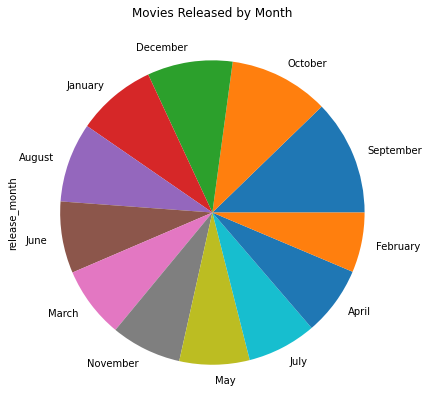

In [199]:
#To plot the number of movies released by month
count_months.plot(kind='pie', figsize=(7,7))
plt.title('Movies Released by Month');

Findings: Most movies were released in September and the least in April. The rest of the months were fairly evenly distributed throughout the year.

#### Which release month has the highest average revenue?

In [177]:
#To get the mean revenue for each release month
df[['revenue_adj', 'release_month']].groupby('release_month').agg(['mean']).sort_values(by=('revenue_adj','mean'), ascending=False)

,revenue_adj
,mean
release_month,
June,9.759761e+07
December,8.476453e+07
May,7.624643e+07
July,7.329208e+07
November,7.186496e+07
March,4.950355e+07
April,3.971626e+07
August,3.546830e+07


Findings: Based on release months, the months of June and December appear to be the highest revenue earners for movies in the dataset.

#### Which release month has the highest average popularity in the last ten years?

For this investigation, it would be interesting to find out the popularity of movie release month within the last ten years in the data set, since the data is more current. This will also provide further insight on the best time to release a movie. 

In [189]:
#To get the earliest release date
df['release_date'].min()

Timestamp('1960-01-01 00:00:00')

In [182]:
#To get the latest release date
df['release_date'].max()

Timestamp('2015-12-31 00:00:00')

In [183]:
#To create a filter to get data from the last ten years, pass a filter and specify the dates

filt = (df['release_date'] >= pd.to_datetime('2006-01-01')) & (df['release_date'] < pd.to_datetime('2015-12-31'))
df.loc[filt]

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,21623,0.017396,Beneath,Dagen Merrill,82,Horror|Mystery|Thriller,2007-07-08,14,5.0,2007,0.000000e+00,0.000000e+00,July,Sunday
7821,39561,0.013017,Testosteron,Tomasz Konecki|Andrzej Saramonowicz,116,Comedy,2007-03-02,10,6.0,2007,1.156835e+06,0.000000e+00,March,Friday
7822,36443,0.010471,The Union: The Business Behind Getting High,Brett Harvey,104,Comedy|Documentary,2007-05-08,14,6.8,2007,2.103337e+05,0.000000e+00,May,Tuesday
7823,19934,0.009512,Ce soir je dors chez toi,Olivier Baroux,84,Comedy,2007-11-21,12,5.3,2007,0.000000e+00,0.000000e+00,November,Wednesday


It would be interesting to conduct an analysis of the dataframe so that it only investigates the data that was collected within the last 10 years in the data set. For this, we would need to create a boolean mask.

In [190]:
# Let's construct Boolean mask  
mask = df['release_date'].between('2006-01-01', '2015-12-31')
mask

0         True
1         True
2         True
3         True
4         True
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Name: release_date, Length: 10865, dtype: bool

In [185]:
# Let's apply the Boolean mask
imdb_df = df[mask]

In [186]:
#to check if changes have taken place
imdb_df['release_date'].min()

Timestamp('2006-01-01 00:00:00')

In [191]:
#To get the popularity mean for each release month
popularity_means = df.groupby('release_month')['popularity'].mean().sort_values(ascending=False)
popularity_means

release_month
June         0.800755
November     0.755466
December     0.750784
May          0.749997
July         0.747678
March        0.642808
October      0.613168
February     0.589931
August       0.584363
September    0.564820
April        0.562475
January      0.460574
Name: popularity, dtype: float64

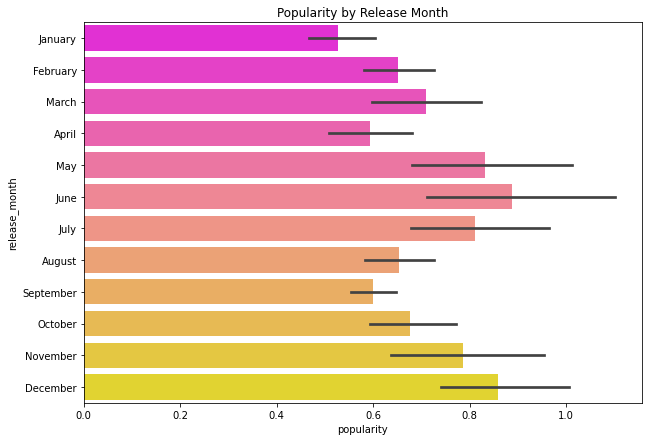

In [195]:
#To visualize the results
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x='popularity', y='release_month', data=imdb_df, palette='spring', order= order)
plt.title('Popularity by Release Month')
plt.gcf().set_size_inches(10,7)
plt.show();

Findings: Movies released in the months of June and December appear to be the most popular which corresponds to the initial analysis of revenue earned.

<a id='conclusions'></a>
## Conclusion

**Limitations**
The main limitation of this analysis was that there were significant number of zero values in the revenue_adj and budget_adj columns that were used in this analysis which influenced reliability of the data. This is also my first project and very basic data analysis skills were used to analyze the data which may impact the outcome.

**Additional Research**
More comprehensive analysis is required for the correlation between the genres, budget and revenue. This study did not explore the correlation between the gender of the movies and other features of the data set which may be quite insightful for the movie industry.

**Summary of Findings**

1. The correlation analysis and Heatmap showed a high correlation for Popularity with all the significant features as follows:

- vote_count   (0.800828) - a high positive relationship between vote count and popularity
- revenue_adj  (0.609085) - a high positive relationship between vote count and popularity
- budget_adj   (0.513555) - a medium positive relationship between vote count and popularity
- vote_average (0.209517) - a low positive relationship between vote count and popularity
- runtime      (0.139032) - a low positive relationship between vote count and popularity
- release_year (0.089806) - a low positive relationship between vote count and popularity

2. An analysis of directors, their popularity and the revenue earned indicates that whereas there is a positive correlation between popularity and revenues, it is not necessary for a movie to be popular to earn high revenue. It is also clear that the popularity of a director does not determine the number of movies they produce or the revenue earned by their movies. 


3. An analysis of the best time to release a movie shows that June and December are the best months to release a movie. The revenue and popularity of movies earned in those two months are significantly higher. However, the number of movies released per month does not show a significant impact on popularity and revenues. Most movies were released in September and October and the least released in April.

In Summary, the above analsyis and visualizations were able to answer the two research questions.

**References**
1. I got some inspiration from this site https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-movies-on-streaming-platforms-5ea494fee9d2
2. I got a lot of solutions from the stack overflow  https://stackoverflow.com/questions/ and the geek for geek websites https://www.geeksforgeeks.org
3. A lot of reference was also made to the official pandas documentation site https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#reshaping.